# SLO Twitter Data Analysis  - Language Statistics

Setup Jupyter Notebook kernel for SLO data analysis.<br>

In [2]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-27-19.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):



This section of our data analysis currently covers a comparison of Twitter API language detection versus spaCy language detection.



## "spaCy-langdetect" Language Detection Python Package:


This is a pivot table created in Microsoft Excel using our Twitter Dataset that shows the comparison of the language the Tweet is identified using the native Twitter language detection versus the "spaCy" natural language processing library, "lang-detect" library, and "spacy-langdetect" library.



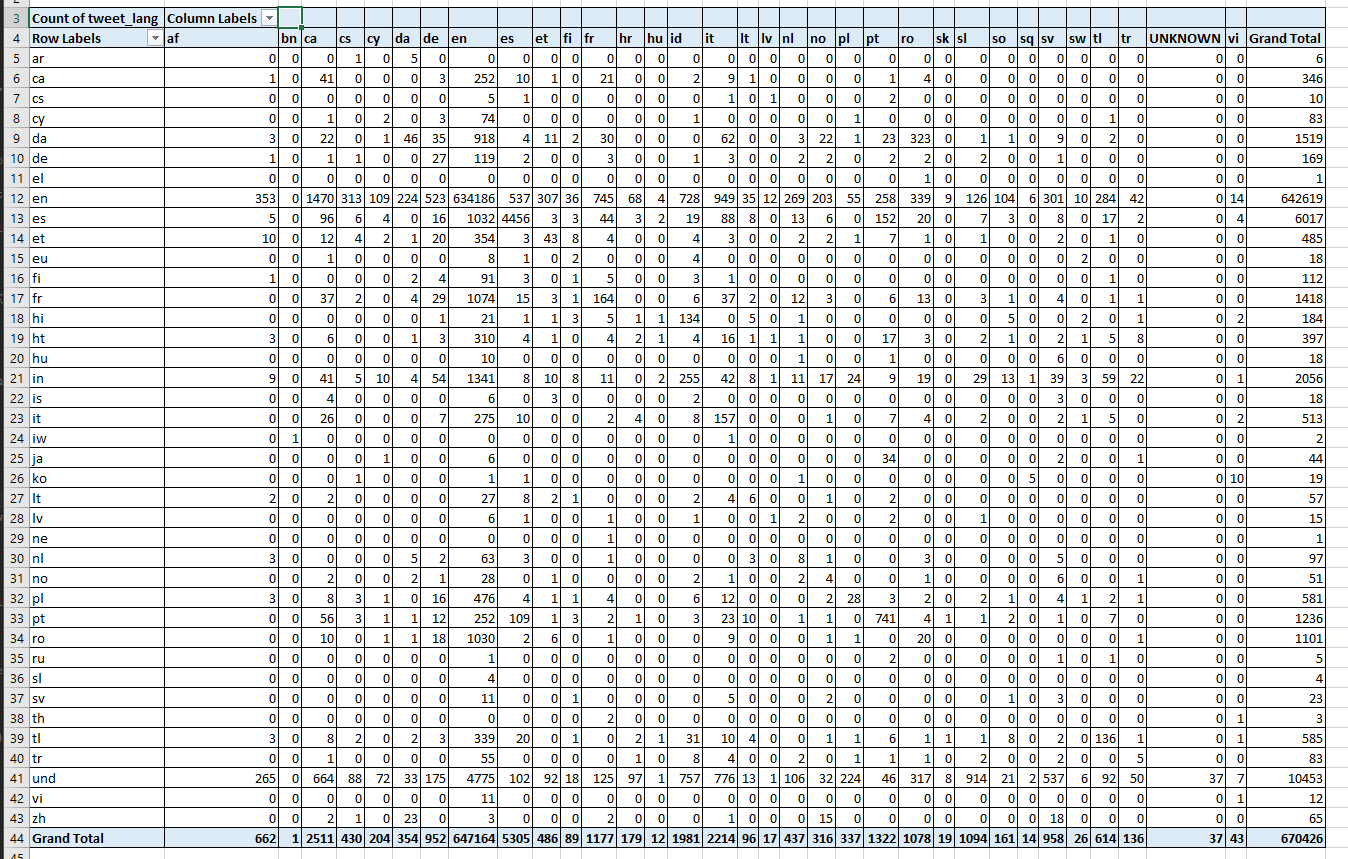

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = "images/"
Image(filename = PATH + "spacy_versus_twitter_lang-pivot_table.png", width=1024, height=768)


A zoomed in view of the pivot table for ease of viewing.<br>



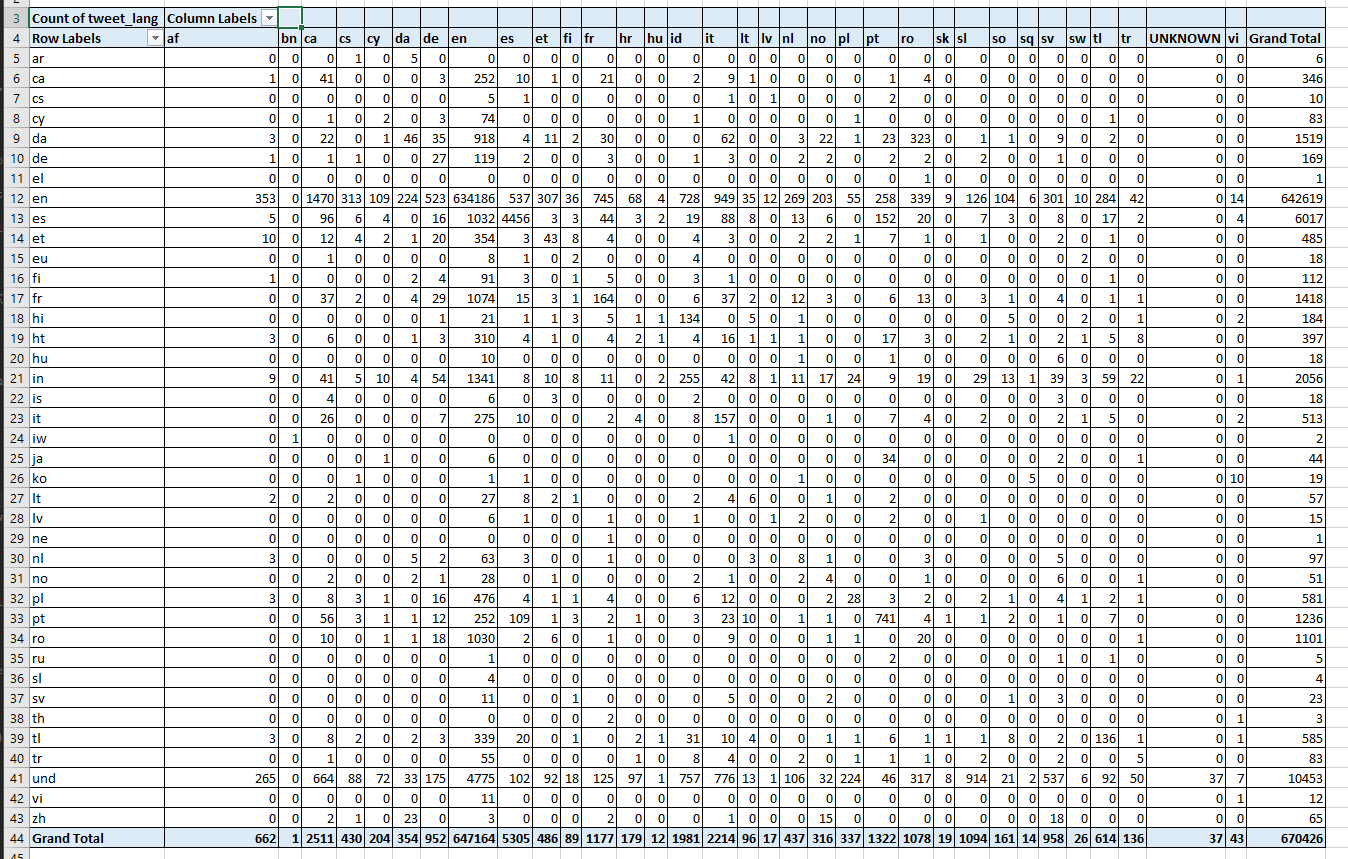

In [4]:
from IPython.core.display import Image, display
display(Image('images/spacy_versus_twitter_lang-pivot_table.png', width=1900, unconfined=True))


"spaCy" and "lang-detect" seem to do a comparable job to the Twitter API in identifying the correct language of the Tweet.  We originally used the "polyglot" library for language detection but as we are currently working on a Windows workstation we are having difficulty getting "polyglot" to function.<br>



## Subtitle Placeholder:

In [3]:
    english = tweet_dataframe.loc[tweet_dataframe["spaCy_language_detect"] == "en"]
    non_english = tweet_dataframe.loc[tweet_dataframe["spaCy_language_detect"] != "en"]

    print(f"# of English Tweets as determined by spaCy: {english.shape[0]}")
    print(f"# of non-English Tweets as determined by spaCy: {non_english.shape[0]}")

    print(f"Percentage of English Tweets in dataset is {english.shape[0] / tweet_dataframe.shape[0] * 100.0}")
    print(f"Percentage of non-English Tweets in dataset is {non_english.shape[0] / tweet_dataframe.shape[0] * 100.0}")

# of English Tweets as determined by spaCy: 647164
# of non-English Tweets as determined by spaCy: 23262
Percentage of English Tweets in dataset is 96.53026583097912
Percentage of non-English Tweets in dataset is 3.469734169020891



The "spaCy-langdetect" library does a decent job of identifying the language of the Tweet text in comparison to the Twitter API.  However, it is inferior to using "textblob", another Python library, which uses the Google Translate API to perform language detection.  Unfortunately, Google Translate is no longer free and is now a paid service.  Thus, we are forced to find free alternatives.  Based on our current results, we feel it is best that we simply drop all non-English Tweets as identified by the "spacy-langdetect" Python library.<br>


